In [ ]:
# !pip install google_play_scraper

##### 구글앱 코드 참고

1. [블로그](https://blog.naver.com/kgh5654/222829820507)

In [ ]:

# 앱 이름 추출 
from google_play_scraper import app
result = app(
    'droom.sleepIfUCan',            # 앱 id
    lang='ko', # efaults to 'en'    # 언어 
    country='kr' # defaults to 'us' # 국가
)

In [ ]:
# 앱 리뷰
from google_play_scraper import Sort, reviews_all
result = reviews_all(
    'droom.sleepIfUCan',
    sleep_milliseconds=10, # 프로그램 실행 중지 시간(대기시간) : 대량의 요청으로 많은 트랙픽이 발생하므로
    lang='ko', # 언어
    country='kr', # 국가
    sort=Sort.MOST_RELEVANT, # 정렬(관련성, 최신 등 가능)
    filter_score_with=None # 별점 필터 None : 모든 별점을 뜻함
)

In [ ]:
print(result)

In [ ]:
# 어떤 기준으로 정렬할 것인지?
# 어떤 별점을 추출할 것인지?

# 4-5 점을 준 유저의 특성 구분 > 이를 통해 잠재적 고객 및 유료 전환을 파악
# 1-2 점을 준 유저의 특성 구분 > 어떤 이유로 이탈하는지, 개선 방향 확인 

In [2]:

import pandas as pd

# result=pd.DataFrame(result)
# result.to_excel('딜라이트_구글앱리뷰.xlsx', engine='xlsxwriter')

In [7]:
# 자연어 처리 => 긍정적 리뷰와 부정적 리뷰 확인
# 100자 이상의 후기글을 요약
# 피드백 활용


- 저장한 리뷰 파일 불러오기

In [10]:
# !pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ------------------------------------- 250.0/250.0 kB 15.0 MB/s eta 0:00:00


In [21]:
df = pd.read_excel('딜라이트_구글앱리뷰.xlsx')

In [34]:
# !pip install aspose-cells


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
      --------------------------------------- 0.2/12.3 MB 4.1 MB/s eta 0:00:03
     - -------------------------------------- 0.6/12.3 MB 7.1 MB/s eta 0:00:02
     --- ------------------------------------ 1.1/12.3 MB 8.7 MB/s eta 0:00:02
     ------ --------------------------------- 1.9/12.3 MB 10.7 MB/s eta 0:00:01
     -------- ------------------------------- 2.7/12.3 MB 12.4 MB/s eta 0:00:01
     ------------ --------------------------- 3.9/12.3 MB 14.0 MB/s eta 0:00:01
     ---------------- ----------------------- 5.2/12.3 MB 16.5 MB/s eta 0:00:01
     -------------------- ------------------- 6.5/12.3 MB 17.2 MB/s eta 0:00:01
     ---------------------- ----------------- 7.1/12.3 MB 17.4 MB/s eta 0:00:01
     -------------------------- ------------- 8.1/12.3 MB 17.9 MB/s eta 0:00:01
     --------------------------- ------------ 8.6/12.

In [35]:
import jpype
import asposecells
jpype.startJVM()
from asposecells.api import Workbook, SaveFormat

# Create a Workbook object with Excel file's path
workbook =  Workbook("딜라이트_구글앱리뷰.xlsx")

# Save XLSX as CSV
workbook.save("dromm_google.csv" , SaveFormat.CSV)

In [55]:
df2 = pd.read_csv('dromm_google.csv')

In [56]:
df2.head(3)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,ef9743e9-6ec4-4124-bf2c-7dd77ea3e131,물흐리기,https://play-lh.googleusercontent.com/a/AGNmyx...,몇년째 너무 유용하게 사용하고 있습니다 옛날에 사용하던 갤럭시s9+로 사용해서 그런...,5.0,7.0,5.54.04,2023-03-30 11:31:21,"안녕하세요, 알라미팀입니다. 자꾸만 홈화면으로 나가 전원을 끄게 되어 불편하셨을 것...",2023-04-05 11:51:48
1,1,55155585-be75-4a6c-95fa-e6e62e55d207,JS,https://play-lh.googleusercontent.com/a/AGNmyx...,잘 쓰고있습니다 다만 한가지 문제가 있어 질문드립니다. 알람이 울리고 끄고 다시 자...,5.0,4.0,5.55.00,2023-03-31 20:04:48,"안녕하세요, 알라미팀입니다. 알람을 오래 울리게 둔 상태에서 발열이 심해져 불편을 ...",2023-04-05 11:55:38
2,2,a4108fea-8155-45de-8b73-164149537e83,김지윤,https://play-lh.googleusercontent.com/a-/ACB-R...,"나쁘지 않게 사용하고 있는 어플인데.. 분명 문제 풀 때, 무제한으로 음소거 가능하...",3.0,64.0,5.51.05,2023-02-11 07:59:23,"안녕하세요, 미션 중 음소거 무제한 설정을 해뒀음에도 소리가 울려 많이 놀라셨을 것...",2023-02-14 10:48:04


- 불필요한 행 삭제

In [57]:
df2 = df2.drop(['Unnamed: 0', 'reviewId', 'userImage', 'repliedAt'], axis=1)

In [58]:
df2

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent
0,물흐리기,몇년째 너무 유용하게 사용하고 있습니다 옛날에 사용하던 갤럭시s9+로 사용해서 그런...,5.0,7.0,5.54.04,2023-03-30 11:31:21,"안녕하세요, 알라미팀입니다. 자꾸만 홈화면으로 나가 전원을 끄게 되어 불편하셨을 것..."
1,JS,잘 쓰고있습니다 다만 한가지 문제가 있어 질문드립니다. 알람이 울리고 끄고 다시 자...,5.0,4.0,5.55.00,2023-03-31 20:04:48,"안녕하세요, 알라미팀입니다. 알람을 오래 울리게 둔 상태에서 발열이 심해져 불편을 ..."
2,김지윤,"나쁘지 않게 사용하고 있는 어플인데.. 분명 문제 풀 때, 무제한으로 음소거 가능하...",3.0,64.0,5.51.05,2023-02-11 07:59:23,"안녕하세요, 미션 중 음소거 무제한 설정을 해뒀음에도 소리가 울려 많이 놀라셨을 것..."
3,J Lee,잘쓰고 있었는데 얼마전 이상한 일이 일어남. 알람을 5개씩 맞췄는데도 아침에 내가 ...,1.0,0.0,5.55.00,2023-04-06 07:26:43,NaN
4,홍성민,다시 잠들기 기능 등 다 좋습니다. 다만 다른 사람의 의견에는 '알람 해제 어려움'...,5.0,8.0,5.54.51-beta,2023-03-30 22:26:19,"안녕하세요, 소중한 시간 내어 의견 남겨주셔서 감사해요. 원하시는 일정에 따라 알람..."
...,...,...,...,...,...,...,...
53811,Google 사용자,조음,5.0,0.0,NaN,2013-04-03 16:15:31,NaN
53812,Google 사용자,올,5.0,0.0,NaN,2013-03-05 03:31:30,NaN
53813,Google 사용자,good,4.0,0.0,NaN,2013-02-15 04:10:43,NaN
53814,Google 사용자,good,5.0,0.0,NaN,2013-03-15 02:22:05,NaN


In [59]:
# score 분포 확인하기

import matplotlib.pyplot as plt 
import seaborn as sns

<Axes: xlabel='score', ylabel='Count'>

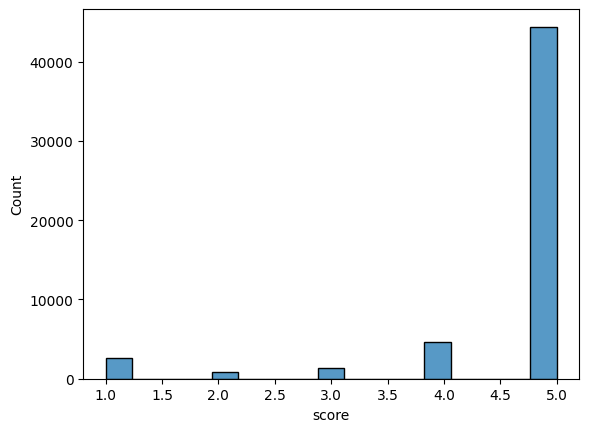

In [60]:
sns.histplot(data=df2, x='score')

In [61]:
vc = df2['score'].value_counts().sort_index(ascending=False)

In [62]:
vc

score
5.0    44396
4.0     4654
3.0     1391
2.0      812
1.0     2562
Name: count, dtype: int64

[Text(0, 0, '2562'),
 Text(0, 0, '812'),
 Text(0, 0, '1391'),
 Text(0, 0, '4654'),
 Text(0, 0, '44396')]

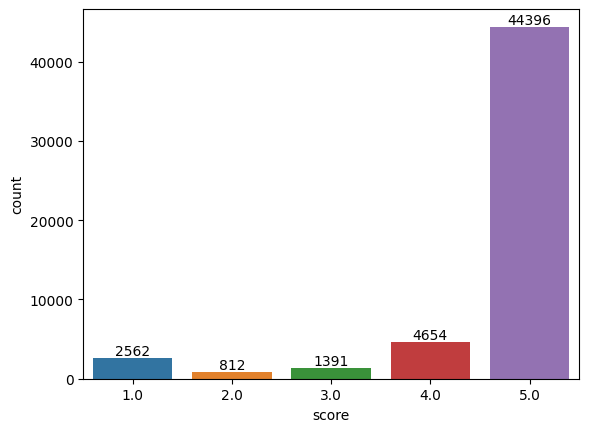

In [63]:
ct = sns.countplot(x = 'score', data = df2)
ct.bar_label(ct.containers[0])

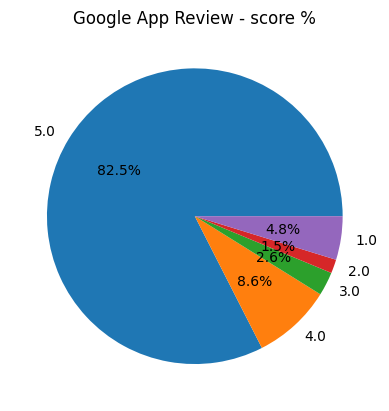

In [64]:
plt.pie(vc, labels=vc.index, autopct='%.1f%%')
plt.title('Google App Review - score %')
# plt.legend()
plt.show()

In [65]:
# 긍정적 리뷰의 요약
# 부정적 리뷰의 요약 (score: 1~2)

In [82]:
df = df2.loc[(df2['score'] == 1.0) | (df2['score'] == 2.0)]

In [ ]:
df_12 = (df2.score == 1.0) | (df2.score == 2.0) # 조건식작성
# df[condition) 

In [ ]:
df_12

In [93]:
df2

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent
0,물흐리기,몇년째 너무 유용하게 사용하고 있습니다 옛날에 사용하던 갤럭시s9+로 사용해서 그런...,True,7.0,5.54.04,2023-03-30 11:31:21,"안녕하세요, 알라미팀입니다. 자꾸만 홈화면으로 나가 전원을 끄게 되어 불편하셨을 것..."
1,JS,잘 쓰고있습니다 다만 한가지 문제가 있어 질문드립니다. 알람이 울리고 끄고 다시 자...,True,4.0,5.55.00,2023-03-31 20:04:48,"안녕하세요, 알라미팀입니다. 알람을 오래 울리게 둔 상태에서 발열이 심해져 불편을 ..."
2,김지윤,"나쁘지 않게 사용하고 있는 어플인데.. 분명 문제 풀 때, 무제한으로 음소거 가능하...",True,64.0,5.51.05,2023-02-11 07:59:23,"안녕하세요, 미션 중 음소거 무제한 설정을 해뒀음에도 소리가 울려 많이 놀라셨을 것..."
3,J Lee,잘쓰고 있었는데 얼마전 이상한 일이 일어남. 알람을 5개씩 맞췄는데도 아침에 내가 ...,True,0.0,5.55.00,2023-04-06 07:26:43,NaN
4,홍성민,다시 잠들기 기능 등 다 좋습니다. 다만 다른 사람의 의견에는 '알람 해제 어려움'...,True,8.0,5.54.51-beta,2023-03-30 22:26:19,"안녕하세요, 소중한 시간 내어 의견 남겨주셔서 감사해요. 원하시는 일정에 따라 알람..."
...,...,...,...,...,...,...,...
53811,Google 사용자,조음,True,0.0,NaN,2013-04-03 16:15:31,NaN
53812,Google 사용자,올,True,0.0,NaN,2013-03-05 03:31:30,NaN
53813,Google 사용자,good,True,0.0,NaN,2013-02-15 04:10:43,NaN
53814,Google 사용자,good,True,0.0,NaN,2013-03-15 02:22:05,NaN


In [84]:
df = df.reset_index(drop=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53816 entries, 0 to 53815
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userName              53815 non-null  object 
 1   content               53737 non-null  object 
 2   score                 53816 non-null  float64
 3   thumbsUpCount         53815 non-null  float64
 4   reviewCreatedVersion  50073 non-null  object 
 5   at                    53815 non-null  object 
 6   replyContent          14941 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.9+ MB


In [91]:
df.isnull().sum()

userName                    0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion     3742
at                          0
replyContent            38796
dtype: int64

- content 내용이 null 값인 행 삭제
 

In [89]:
df.dropna(subset=['content'], inplace=True)

In [42]:
from transformers import PreTrainedTokenizerFast
from transformers import BartForConditionalGeneration

import pandas as pd
import torch

c:\ProgramData\Anaconda3\envs\server\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:

tokenizer = PreTrainedTokenizerFast.from_pretrained('digit82/kobart-summarization')
model = BartForConditionalGeneration.from_pretrained('digit82/kobart-summarization')
tokenizer = PreTrainedTokenizerFast.from_pretrained('digit82/kobart-summarization')

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


In [44]:
def generate_summary(text):
    if len(text) > 100:
        raw_input_ids = tokenizer.encode(text)
        input_ids = [tokenizer.bos_token_id] + raw_input_ids + [tokenizer.eos_token_id]
        summary_ids = model.generate(torch.tensor([input_ids]), num_beams=5, max_length=1024, no_repeat_ngram_size=2)
        return tokenizer.decode(summary_ids.squeeze().tolist(), skip_special_tokens=True)
    else:
        return text